#Exploratory Data Analysis, POS, & NER


##Importing Dataset

In [2]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/PBA/hasil_preprocessing.xlsx'

df_processed = pd.read_excel(file_path)

Mounted at /content/drive


In [2]:
df_processed

,NO,SUMBER,PENERBIT,LINK,JUDUL,date_final,konten_final,Label
0,2,economic,Detik,https://finance.detik.com/berita-ekonomi-bisni...,dirjen pajak ungkap kabar terbaru soal perbaik...,Tidak ada tanggal,direktur jenderal pajak suryo utomo ungkap kab...,positif
1,3,economic,Detik,https://finance.detik.com/berita-ekonomi-bisni...,djp klaim aplikasi coretax mulai stabil digunakan,25-03-2025,rata bawah performa baik catat april scroll co...,netral
2,5,local news,DDTC,https://news.ddtc.co.id/berita/nasional/181042...,"latensi turun, djp klaim coretax system sudah ...",30-04-2025,ditjen pajak nilai performa coretax administra...,negatif
3,6,economic,Detik,https://finance.detik.com/berita-ekonomi-bisni...,awas penipuan catut nama coretax! begini modus...,Tidak ada tanggal,akhir marak tipu mengatasnamakan implementasi ...,negatif
4,7,local news,Tempo,https://www.tempo.co/ekonomi/hari-ini-direktor...,hari ini direktorat jenderal pajak rapat tertu...,01-01-2025,direktur jenderal dirjen pajak menteri uang su...,negatif
...,...,...,...,...,...,...,...,...
149,155,local news,CNBC,https://www.cnbcindonesia.com/news/20250114071...,keluhan soal coretax terus muncul: sistem tak ...,01-01-2025,kalang usaha pakar pajak beri catat khusus per...,negatif
150,156,local news,Viva,https://www.viva.co.id/bisnis/1809316-coretax-...,"coretax bermasalah di awal tahun, misbakhun te...",22-03-2025,bulan makanya misbakhun minta laku pasar modal...,netral
151,157,economic,Tempo,https://www.tempo.co/ekonomi/luhut-sebut-siste...,"luhut sebut sistem coretax akan membaik, apa i...",17-01-2025,masalah pekan dua implementasi ketua dewan eko...,netral
152,159,economic,Oke Zone,https://economy.okezone.com/read/2025/04/24/32...,sri mulyani pamer setoran pajak naik jadi rp13...,24-04-2025,menteri uang mulyani indrawati ungkap terima p...,positif


# Exploratory Data Analysis

## DataFrame Information

In [3]:
# prompt: buatkan kode untuk exploratory data analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic Information
print("=== Basic Info ===")
print(df_processed.info())
print("\n=== Descriptive Statistics ===")
print(df_processed.describe())

# Missing Values
print("\n=== Missing Values ===")
print(df_processed.isnull().sum())


=== Basic Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NO            154 non-null    int64 
 1   SUMBER        154 non-null    object
 2   PENERBIT      154 non-null    object
 3   LINK          154 non-null    object
 4   JUDUL         154 non-null    object
 5   date_final    154 non-null    object
 6   konten_final  154 non-null    object
 7   Label         154 non-null    object
dtypes: int64(1), object(7)
memory usage: 9.8+ KB
None

=== Descriptive Statistics ===
               NO
count  154.000000
mean    82.233766
std     45.071735
min      2.000000
25%     44.250000
50%     82.500000
75%    120.750000
max    160.000000

=== Missing Values ===
NO              0
SUMBER          0
PENERBIT        0
LINK            0
JUDUL           0
date_final      0
konten_final    0
Label           0
dtype: int64


## Jumlah Review Setiap Bulan

/tmp/ipython-input-4-2028249351.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_final'] = pd.to_datetime(df['date_final'], errors='coerce')


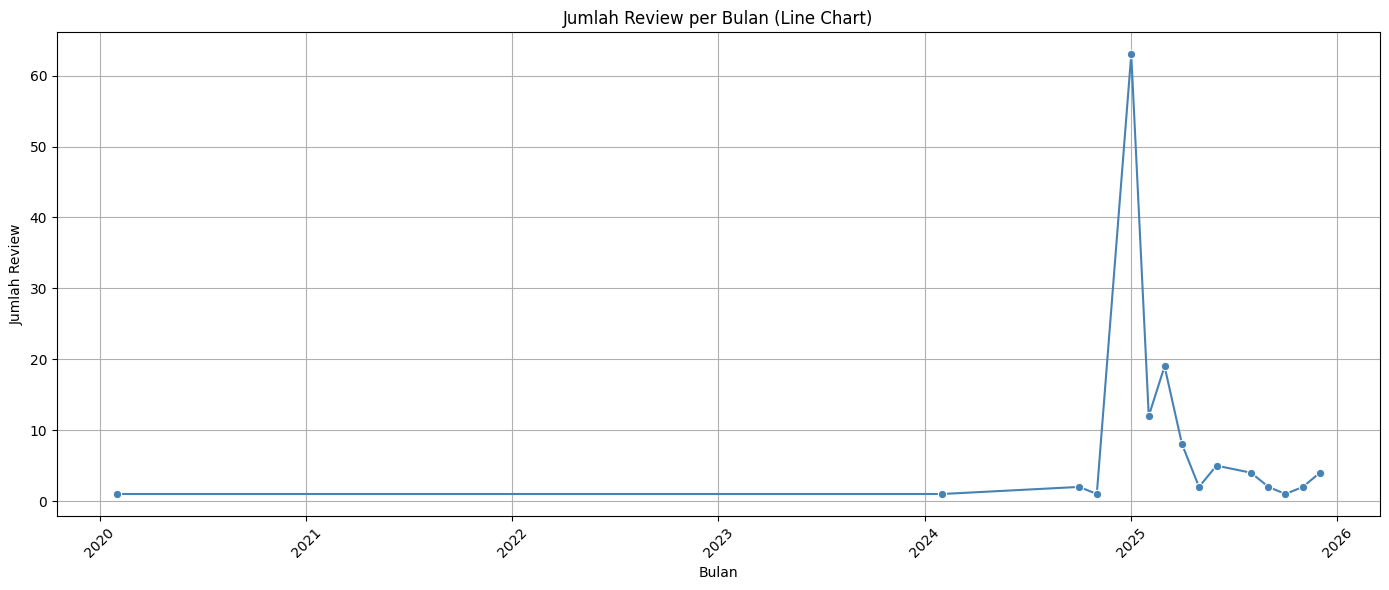

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Salin dataframe
df = df_processed.copy()

# Hapus baris dengan tanggal tidak valid
df = df.dropna(subset=['date_final'])

# Ubah kolom menjadi format datetime
df['date_final'] = pd.to_datetime(df['date_final'], errors='coerce')

# Ekstrak bulan dan tahun
df['month'] = df['date_final'].dt.month
df['year'] = df['date_final'].dt.year

# Kelompokkan dan hitung jumlah review per bulan
monthly_reviews = df.groupby(['year', 'month']).size().reset_index(name='review_count')

# Gabungkan jadi satu kolom datetime untuk visualisasi (format: YYYY-MM)
monthly_reviews['month_year'] = pd.to_datetime(monthly_reviews[['year', 'month']].assign(day=1))

# Urutkan berdasarkan waktu
monthly_reviews = monthly_reviews.sort_values('month_year')

# Buat line chart
plt.figure(figsize=(14, 6))
sns.lineplot(x='month_year', y='review_count', data=monthly_reviews, marker='o', color='steelblue')

plt.title('Jumlah Review per Bulan (Line Chart)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Review')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Frekuensi Sumber


=== Frequency of Sumber ===
SUMBER
local news    79
economic      51
opinion       18
academic       6
Name: count, dtype: int64


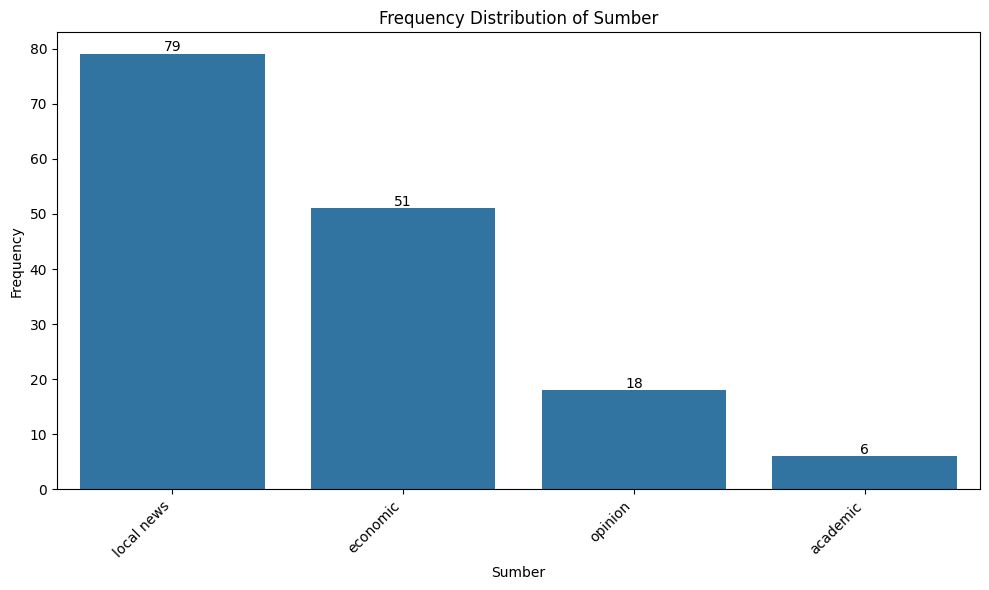

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cek frekuensi kolom 'SUMBER'
print("\n=== Frequency of Sumber ===")
print(df_processed['SUMBER'].value_counts())

# Visualisasi distribusi frekuensi
plt.figure(figsize=(10, 6))

# Urutan kategori berdasarkan frekuensi (menurun)
order = df_processed['SUMBER'].value_counts().index

# Buat countplot dan simpan sebagai objek ax
ax = sns.countplot(x='SUMBER', data=df_processed, order=order)

# Tambahkan label di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # posisi x di tengah bar
        height + 0.5,                   # sedikit di atas bar
        int(height),                    # nilai yang ditampilkan
        ha='center'
    )

plt.title('Frequency Distribution of Sumber')
plt.xlabel('Sumber')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Biar tidak terpotong
plt.show()


## Distribusi Penerbit


=== Frequency of Penerbit ===
PENERBIT
DDTC                         18
Tempo                        17
CNBC                         12
Kontan                       10
Hukum Online                 10
Kompas                        8
Bisnis                        7
ORTAX                         7
Detik                         6
Antara News                   4
MetroTV                       4
NTVNews                       3
CNN                           3
Kompasiana                    3
Pajak                         3
UGM                           2
Untirta                       2
RMOL                          2
djp                           2
pajakku                       2
Buleleng Kab                  2
Investor                      2
Pajak Online                  1
Balikpapan Pos                1
Inter Counbix                 1
Konsultan Manajemen Pajak     1
Goriau                        1
Emitennews                    1
Fajar                         1
Bloomberg Technoz             1


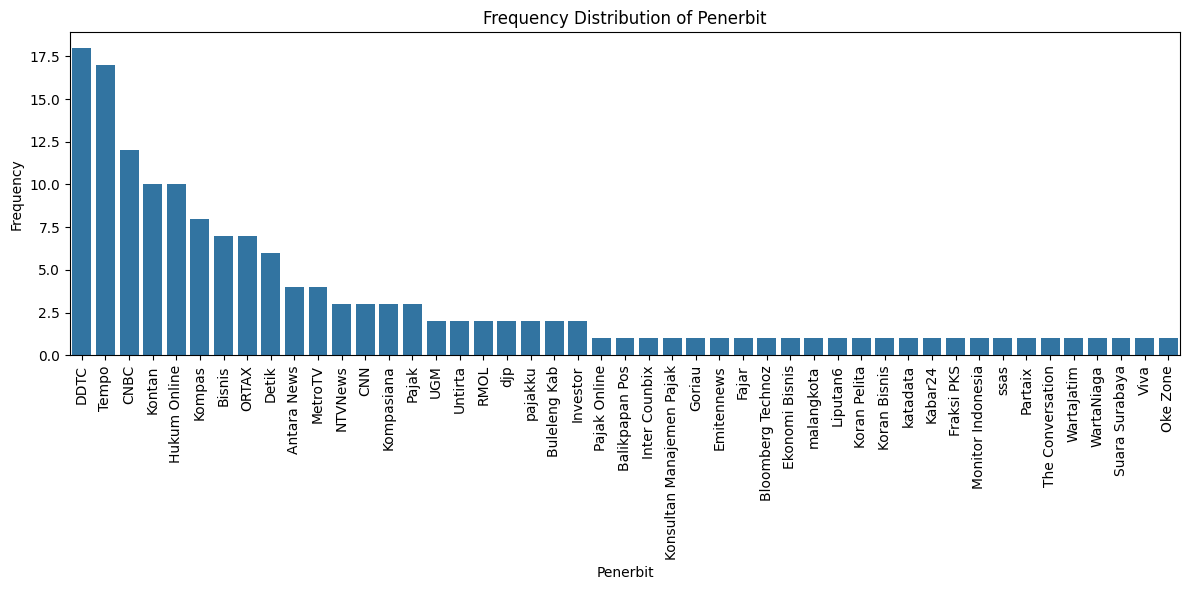

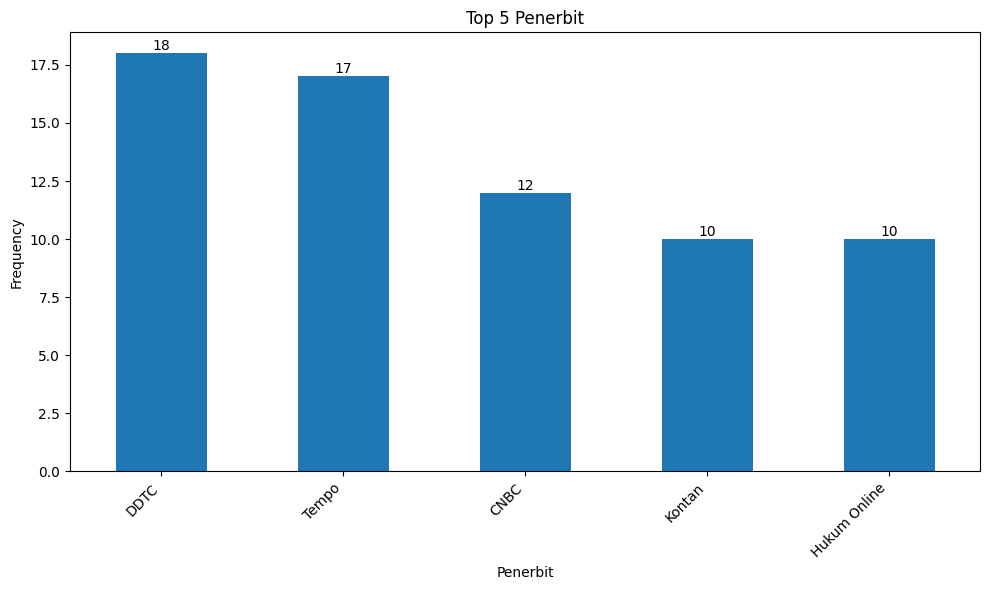

In [6]:
import matplotlib.pyplot as plt
# --- PENERBIT Frequency Analysis and Visualization ---
# Frequency counts
print("\n=== Frequency of Penerbit ===")
penerbit_counts = df_processed['PENERBIT'].value_counts()
print(penerbit_counts)

# Top 5 Penerbit
print("\n=== Top 5 Penerbit ===")
top_5_penerbit = penerbit_counts.head(5)
print(top_5_penerbit)

# Plot full distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='PENERBIT', data=df_processed, order=penerbit_counts.index)
plt.title('Frequency Distribution of Penerbit')
plt.xlabel('Penerbit')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot Top 5 with labels
plt.figure(figsize=(10, 6))
ax = top_5_penerbit.plot(kind='bar')
plt.title('Top 5 Penerbit')
plt.xlabel('Penerbit')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Add value labels on each bar
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom')

add_labels(ax)
plt.tight_layout()
plt.show()


# POS Tagging


POS Tagging (Part-of-Speech Tagging) adalah proses pemberian label pada setiap kata dalam suatu teks dengan kategori gramatikalnya, seperti kata benda, kata kerja, kata sifat, dan sebagainya.

## Installing & Importing Dependencies

In [7]:
# Install Dependencies
!pip install polyglot
!pip install pyicu
!pip install pycld2
!pip install morfessor
!pip install wordcloud
!pip install seaborn
!pip install stanza

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# Install Polyglot Embeddings untuk Bahasa Indonesia
!polyglot download pos2.id
!polyglot download embeddings2.id


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52563 sha256=512e0f9b99bed9828ba9d57700e5fbf2c1410bc7b5db0de266447e43f00d5658
  Stored in directory: /root/.cache/pip/wheels/70/e3/da/d2f524831513cedfe2a49e46a94028bf6f632f6ba172d6dead
Successfully built polyglot
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.7/267.7 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyicu: filename=pyicu-2.15.2-cp311-cp311-linux_x86_64.whl size=2690997 sha256=dbcd304ebefaec1caeaf27efbbef9be914b3ded56bea17c616ce2ea4e500371f
  Stored in directory: /root/.cache/pip/wheels/d6/8f/fc/8184fe368e89ab76c136ba372b0127dd64c10830991f9301ab
Successfully built pyicu
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 68.2 MB/s eta 0:00

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[polyglot_data] Error loading pos2.id: HTTP Error 403: Forbidden
Error installing package. Retry? [n/y/e]
y
Traceback (most recent call last):
  File "/usr/local/bin/polyglot", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/polyglot/__main__.py", line 280, in main
    args.func(args)
  File "/usr/local/lib/python3.11/dist-packages/polyglot/__main__.py", line 108, in download
    rv = downloader.download(info_or_id=unicode(pkg_id), download_dir=args.dir,
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/polyglot/downloader.py", line 676, in download
    if not self.download(msg.package.id, download_dir,
                         ^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'id'
[polyglot_data] Error loading embeddings2.id: HTTP Error 403:
[polyglot_data]     Forbidden
Error installing package. Retry? [n/y/e]
y
Traceback (most rec

In [8]:
import re
import pandas as pd
from textblob import TextBlob
from collections import Counter
from IPython.display import display

# 1. Define mapping of POS codes to human‑friendly names
pos_label_map = {
    'NN': 'Noun, singular or mass',
    'NNS': 'Noun, plural',
    'NNP': 'Proper noun, singular',
    'NNPS': 'Proper noun, plural',
    'VB': 'Verb, base form',
    'VBD': 'Verb, past tense',
    'VBG': 'Verb, gerund/present participle',
    'VBN': 'Verb, past participle',
    'VBP': 'Verb, non‑3rd person singular present',
    'VBZ': 'Verb, 3rd person singular present',
    'JJ': 'Adjective',
    'JJR': 'Adjective, comparative',
    'JJS': 'Adjective, superlative',
    'RB': 'Adverb',
    'RBR': 'Adverb, comparative',
    'RBS': 'Adverb, superlative',
    'PRP': 'Personal pronoun',
    'PRP$': 'Possessive pronoun',
    'IN': 'Preposition/subordinating conjunction',
    'DT': 'Determiner',
    'CC': 'Coordinating conjunction',
    'UH': 'Interjection',
    'CD': 'Cardinal number',
    'EX': 'Existential there',
    'FW': 'Foreign word',
    'LS': 'List item marker',
    'MD': 'Modal',
    'PDT': 'Predeterminer',
    'POS': 'Possessive ending',
    'RP': 'Particle',
    'SYM': 'Symbol',
    'TO': 'to',
    'UH': 'Interjection',
    'WDT': 'Wh-determiner',
    'WP': 'Wh-pronoun',
    'WP$': 'Possessive wh-pronoun',
    'WRB': 'Wh-adverb'
    # Add more tags if needed
}

# 2. Collect all POS tags from each cleaned review
all_pos = []
word_pos_map = {}
for content in df_processed['konten_final'].fillna(''):
    if content.strip():
        for word, pos in TextBlob(content).tags:
            all_pos.append(pos)
            word_pos_map.setdefault(pos, []).append(word.lower())

# 3. Compute overall counts and unique token counts per tag
pos_counts = Counter(all_pos)
unique_counts = {pos: len(set(words)) for pos, words in word_pos_map.items()}

# 4. Build DataFrame
rows = []
for pos, count in pos_counts.items():
    tag_name = pos_label_map.get(pos)
    if tag_name is None:
        tag_name = 'Other (Tag belum terdefinisi di POS map)'
    rows.append({
        'Tag': pos,
        'Tag Name': tag_name,
        'Count': count,
        'Unique Tokens': unique_counts.get(pos, 0)
    })

pos_df = pd.DataFrame(rows)

# 5. Sort by Count descending and display as table
pos_df = pos_df.sort_values('Count', ascending=False).reset_index(drop=True)
display(pos_df)


,Tag,Tag Name,Count,Unique Tokens
0,NN,"Noun, singular or mass",32841,1812
1,JJ,Adjective,7103,934
2,NNS,"Noun, plural",1833,213
3,VBP,"Verb, non‑3rd person singular present",1412,463
4,VBZ,"Verb, 3rd person singular present",558,113
5,VBD,"Verb, past tense",556,146
6,VBG,"Verb, gerund/present participle",455,50
7,FW,Foreign word,286,79
8,IN,Preposition/subordinating conjunction,265,84
9,NNP,"Proper noun, singular",145,37


In [9]:
# prompt: buatkan hasil POS untuk berita yang dilabeli sentimen negatif

import pandas as pd
# Filter data frame untuk sentimen negatif
df_negatif = df_processed[df_processed['Label'] == 'negatif'].copy()

# Pastikan kolom 'stopword_removal' terisi (handle NaN)
df_negatif['konten_final'] = df_negatif['konten_final'].fillna('')

# Kumpulkan semua POS tags dari review dengan sentimen negatif
all_pos_negatif = []
word_pos_map_negatif = {}

for content in df_negatif['konten_final']:
    if content.strip(): # Pastikan konten tidak kosong setelah fillna
        for word, pos in TextBlob(content).tags:
            all_pos_negatif.append(pos)
            # Mengumpulkan kata-kata unik untuk setiap tag POS
            word_pos_map_negatif.setdefault(pos, set()).add(word.lower())


# Hitung frekuensi masing-masing tag POS
pos_counts_negatif = Counter(all_pos_negatif)

# Hitung jumlah token unik per tag
unique_counts_negatif = {pos: len(words) for pos, words in word_pos_map_negatif.items()}

# Buat DataFrame untuk hasil POS tagging sentimen negatif
rows_negatif = []
for pos, count in pos_counts_negatif.items():
    tag_name = pos_label_map.get(pos) # Gunakan mapping yang sudah ada
    if tag_name is None:
        tag_name = 'Other (Tag belum terdefinisi di POS map)'
    rows_negatif.append({
        'Tag': pos,
        'Tag Name': tag_name,
        'Count': count,
        'Unique Tokens': unique_counts_negatif.get(pos, 0)
    })

pos_df_negatif = pd.DataFrame(rows_negatif)

# Urutkan berdasarkan hitungan (descending)
pos_df_negatif = pos_df_negatif.sort_values('Count', ascending=False).reset_index(drop=True)

# Tampilkan hasil
print("\n=== POS Tagging Results for Negative Sentiment ===")
display(pos_df_negatif)

# Opsional: Tampilkan contoh kata untuk tag POS tertentu pada sentimen negatif
print("\n=== Example Words per POS Tag (Negative Sentiment) ===")
for pos, words in list(word_pos_map_negatif.items())[:10]: # Tampilkan untuk 10 tag pertama
    print(f"Tag '{pos}' ({pos_label_map.get(pos, 'Unknown')}): {list(words)[:10]}...") # Tampilkan hingga 10 kata unik



=== POS Tagging Results for Negative Sentiment ===


,Tag,Tag Name,Count,Unique Tokens
0,NN,"Noun, singular or mass",11828,1379
1,JJ,Adjective,2396,568
2,NNS,"Noun, plural",604,122
3,VBP,"Verb, non‑3rd person singular present",497,239
4,VBD,"Verb, past tense",193,81
5,VBZ,"Verb, 3rd person singular present",180,55
6,VBG,"Verb, gerund/present participle",147,30
7,IN,Preposition/subordinating conjunction,99,49
8,FW,Foreign word,92,41
9,NNP,"Proper noun, singular",39,12



=== Example Words per POS Tag (Negative Sentiment) ===
Tag 'NN' (Noun, singular or mass): ['investasi', 'kamis', 'validation', 'rangkai', 'kendara', 'aktif', 'kritisi', 'rahmanda', 'tunda', 'bocor']...
Tag 'JJ' (Adjective): ['investasi', 'artificial', 'efaktur', 'runtime', 'asosiasi', 'google', 'ubah', 'administrasi', 'pemberitahuan', 'apindo']...
Tag 'VBG' (Verb, gerund/present participle): ['penting', 'sering', 'running', 'filing', 'testing', 'handling', 'making', 'coding', 'daring', 'pusing']...
Tag 'VBZ' (Verb, 3rd person singular present): ['prabowo', 'emergencies', 'lembur', 'adopsi', 'terima', 'denies', 'progres', 'administrasi', 'hasil', 'kampanye']...
Tag 'VBD' (Verb, past tense): ['kamis', 'administrasi', 'wajib', 'khawatir', 'matang', 'saran', 'liput', 'wrote', 'keladi', 'lebaran']...
Tag 'VBP' (Verb, non‑3rd person singular present): ['impor', 'rinto', 'anggota', 'sampai', 'visit', 'have', 'kamis', 'asosiasi', 'terima', 'bridge']...
Tag 'NNS' (Noun, plural): ['bagan', 'akt

In [10]:
# Download the CSV
pos_df.to_csv('pos_tag_counts_coretax_article_news.csv', index=False)

##Compute POS Tag Counts & Counting Common Tagged Words

In [13]:
import stanza
import pandas as pd
from collections import Counter

# Inisialisasi pipeline Bahasa Indonesia
stanza.download('id')  # hanya perlu sekali
nlp = stanza.Pipeline('id', processors='tokenize,pos')

# Fungsi tagging
def get_pos_tags(text):
    doc = nlp(text)
    return [(word.text.lower(), word.upos) for sentence in doc.sentences for word in sentence.words]

# POS tagging untuk seluruh data
df_processed['POS'] = df_processed['konten_final'].apply(get_pos_tags)

# Filter berdasarkan sentimen
df_pos = df_processed[df_processed['Label'].str.lower() == 'positif']
df_neg = df_processed[df_processed['Label'].str.lower() == 'negatif']

# Fungsi untuk ekstraksi top POS
def extract_top_pos(df_subset):
    pos_counter = Counter()
    word_by_pos = {}

    for pos_tags in df_subset['POS']:
        for word, pos in pos_tags:
            pos_counter[pos] += 1
            word_by_pos.setdefault(pos, []).append(word)

    # Ambil 3 POS paling sering
    top_pos = pos_counter.most_common(3)

    result = []
    for pos, count in top_pos:
        words = word_by_pos[pos]
        common_words = Counter(words).most_common(5)
        result.append({
            'POS': pos,
            'Count': count,
            'Top Words': [w for w, _ in common_words]
        })

    return result

# Ambil hasil top POS
top_pos_pos = extract_top_pos(df_pos)
top_pos_neg = extract_top_pos(df_neg)

# Buat DataFrame dari hasil tersebut
df_top_pos_pos = pd.DataFrame([
    {'POS': entry['POS'], 'Jumlah': entry['Count'], **{f'Kata ke-{i+1}': word for i, word in enumerate(entry['Top Words'])}}
    for entry in top_pos_pos
])

df_top_pos_neg = pd.DataFrame([
    {'POS': entry['POS'], 'Jumlah': entry['Count'], **{f'Kata ke-{i+1}': word for i, word in enumerate(entry['Top Words'])}}
    for entry in top_pos_neg
])

# Semua pasangan kata dan POS unik
all_pos_pairs = [pair for pos_list in df_processed['POS'] for pair in pos_list]
unique_pos_pairs = list(set(all_pos_pairs))
df_unique_pos = pd.DataFrame(unique_pos_pairs, columns=['Kata', 'POS']).sort_values(by='Kata')

# Simpan ke Excel (multi-sheet)
with pd.ExcelWriter('pos_tag_results.xlsx', engine='openpyxl') as writer:
    df_top_pos_pos.to_excel(writer, index=False, sheet_name='Top POS Positif')
    df_top_pos_neg.to_excel(writer, index=False, sheet_name='Top POS Negatif')
    df_unique_pos.to_excel(writer, index=False, sheet_name='All Words')

print("File 'pos_tag_results.xlsx' berhasil dibuat dengan 3 sheet:")
print("- Top POS Positif")
print("- Top POS Negatif")
print("- All Words")


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: id (Indonesian) ...


INFO:stanza:Downloaded file to /root/stanza_resources/id/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package    |
--------------------------
| tokenize  | gsd        |
| mwt       | gsd        |
| pos       | gsd_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Done loading processors!


File 'pos_tag_results.xlsx' berhasil dibuat dengan 3 sheet:
- Top POS Positif
- Top POS Negatif
- All Words


#Named Entity Recognition (NER)


In [16]:
# 1. Install transformers
!pip install transformers

# 2. Import
import pandas as pd
import ast
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

# 3. Load NER model khusus Bahasa Indonesia
model_name = "cahya/bert-base-indonesian-NER"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, grouped_entities=True)

# 4. Fungsi ekstraksi entitas
def extract_named_entities(text):
    try:
        results = ner_pipeline(text)
        return [(ent['word'], ent['entity_group']) for ent in results]
    except:
        return []

# 5. Konversi string list jadi list Python asli dan gabung jadi string
def preprocess_stopword_column(text):
    try:
        tokens = ast.literal_eval(text)
        return " ".join(tokens)
    except:
        return ""

# 6. Terapkan ke DataFrame
df_processed['stopword_str'] = df_processed['konten_final'].apply(preprocess_stopword_column)
df_processed['named_entities'] = df_processed['stopword_str'].apply(extract_named_entities)

# 7. Lihat hasil
print(df_processed[['konten_final', 'named_entities']].head())


Some weights of the model checkpoint at cahya/bert-base-indonesian-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(
Asking to truncate to max_length but 

                                        konten_final named_entities
0  direktur jenderal pajak suryo utomo ungkap kab...             []
1  rata bawah performa baik catat april scroll co...             []
2  ditjen pajak nilai performa coretax administra...             []
3  akhir marak tipu mengatasnamakan implementasi ...             []
4  direktur jenderal dirjen pajak menteri uang su...             []


In [18]:
from IPython.display import display, HTML

# Fungsi mewarnai entitas di dalam teks
def highlight_entities(text, entities):
    highlighted_text = text
    offset = 0  # offset agar insert tag tidak merusak posisi entity
    colors = {
        "PER": "#e6ffe6",
        "ORG": "#e6f7ff",
        "LOC": "#fff0e6",
        "MISC": "#f9e6ff",
        "DAT": "#fef9e7",
        "CRD": "#eaeaea",
        "EVT": "#fce5cd",
        "PRD": "#d9d2e9",
        "NOR": "#f4cccc"
    }

    # Urutkan entitas berdasarkan posisi muncul agar tidak salah highlight
    for word, label in entities:
        if word.strip() == "":
            continue
        # Cari posisi kata (bisa jadi multiple jika kata muncul berkali)
        start = highlighted_text.lower().find(word.lower(), offset)
        if start == -1:
            continue
        end = start + len(word)
        color = colors.get(label, "#DDDDDD")
        span = f"<span style='background-color:{color}; padding:2px; border-radius:4px;'>{word} <small>[{label}]</small></span>"
        highlighted_text = highlighted_text[:start] + span + highlighted_text[end:]
        offset = start + len(span)

    return highlighted_text

# Contoh visualisasi pada baris pertama
index = 0
raw_text = df_processed['stopword_str'].iloc[index]
entities = df_processed['named_entities'].iloc[index]

html = highlight_entities(raw_text, entities)
display(HTML(f"<div style='font-family:monospace; line-height:1.8;'>{html}</div>"))




In [19]:
import pandas as pd
from collections import Counter
# Flatten the list of named entities
all_entities = [entity for sublist in df_processed['named_entities'] for entity in sublist]

# Count entity frequencies
entity_counts = Counter(entity[1] for entity in all_entities)

# Create a DataFrame for better visualization
entity_freq_df = pd.DataFrame.from_dict(entity_counts, orient='index', columns=['Frequency'])
entity_freq_df = entity_freq_df.sort_values('Frequency', ascending=False)

# Display the DataFrame
display(entity_freq_df)


,Frequency


In [ ]:
# prompt: # Simpan DataFrame
# output_path = "../data/hasil_preprocessing.xlsx"
# df.to_excel(output_path, index=False)
# ubah dalam bentuk csv

# Simpan DataFrame sebagai CSV
output_path = "../data/hasil_preprocessing.csv"
df.to_csv(output_path, index=False)


## Compute NER & Counting Entity Frequency

In [3]:
!pip install transformers

import pandas as pd
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
from collections import Counter

# Load model dan tokenizer NER Bahasa Indonesia
model_name = "cahya/bert-base-indonesian-NER"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

# Inisialisasi pipeline NER
nlp_ner = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

# Fungsi ekstraksi NER dari teks, abaikan kata dengan hashtag
def extract_ner(text):
    try:
        # Hilangkan kata yang diawali dengan '#'
        filtered_tokens = [token for token in text.split() if not token.startswith('#')]
        clean_text = ' '.join(filtered_tokens)
        result = nlp_ner(clean_text)
        return [(ent['word'], ent['entity_group']) for ent in result]
    except Exception:
        return []

# Terapkan ke data
df_processed['NER'] = df_processed['konten_final'].apply(extract_ner)

# Pisahkan berdasarkan label sentimen
df_pos = df_processed[df_processed['Label'].str.lower() == 'positif']
df_neg = df_processed[df_processed['Label'].str.lower() == 'negatif']

# Fungsi untuk analisis top NER
def analyze_ner(df_subset, top_n=10):
    ner_counter = Counter()
    word_by_ner = {}

    for ner_list in df_subset['NER']:
        for word, label in ner_list:
            ner_counter[label] += 1
            word_by_ner.setdefault(label, []).append(word)

    # Ambil top N label NER
    top_ner = ner_counter.most_common(top_n)

    result = []
    for label, count in top_ner:
        common_words = Counter(word_by_ner[label]).most_common(5)
        result.append({
            'NER Label': label,
            'Jumlah': count,
            **{f'Kata ke-{i+1}': word for i, (word, _) in enumerate(common_words)}
        })
    return pd.DataFrame(result)

# Hasil top NER positif & negatif
df_top_ner_pos = analyze_ner(df_pos)
df_top_ner_neg = analyze_ner(df_neg)

# Semua pasangan unik kata dan NER untuk masing-masing sentimen
def get_unique_ner_words(df_subset, sentimen):
    all_ner_pairs = [pair for ner_list in df_subset['NER'] for pair in ner_list]
    unique_ner_pairs = list(set(all_ner_pairs))
    return pd.DataFrame(unique_ner_pairs, columns=['Kata', 'NER']).assign(Sentimen=sentimen)

df_ner_all_pos = get_unique_ner_words(df_pos, 'Positif')
df_ner_all_neg = get_unique_ner_words(df_neg, 'Negatif')
df_ner_all = pd.concat([df_ner_all_pos, df_ner_all_neg], ignore_index=True).sort_values(by=['NER', 'Kata'])

# Simpan ke file Excel dengan 3 sheet
with pd.ExcelWriter("ner_results.xlsx", engine="openpyxl") as writer:
    df_top_ner_pos.to_excel(writer, index=False, sheet_name="Top NER Positif")
    df_top_ner_neg.to_excel(writer, index=False, sheet_name="Top NER Negatif")
    df_ner_all.to_excel(writer, index=False, sheet_name="All Words NER")

print("File 'ner_results.xlsx' berhasil dibuat dengan 3 sheet:")
print("- Top NER Positif")
print("- Top NER Negatif")
print("- All Words NER")


Some weights of the model checkpoint at cahya/bert-base-indonesian-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


File 'ner_results.xlsx' berhasil dibuat dengan 3 sheet:
- Top NER Positif
- Top NER Negatif
- All Words NER
